In [1]:
import pandas as pd 
import spotipy 
import spotipy.util as sp_util
from spotipy.oauth2 import SpotifyClientCredentials 
import seaborn as sb
from dotenv import load_dotenv
from os.path import join, dirname
import os

%matplotlib inline
dotenv_path = '.env'
load_dotenv(dotenv_path)

cid = os.environ.get("cid")
secret = os.environ.get("secret")
user_id= os.environ.get("user_id")

In [2]:
sp = spotipy.Spotify() 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret,) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

In [5]:
#spotify:user:12124178452
playlist = sp.user_playlists(user=user_id, limit=50)

#print(playlist['items'][0])
playlist_id = []

for x in playlist['items']:
    playlist_id.append(x['id'])
    info ='{} => {} total: {}'.format(x['id'], x['name'], x['tracks']['total'])
    print(info)
    

37i9dQZF1E4TYPiZry5xy7 => Your Time Capsule total: 55
37i9dQZEVXcGQdhyyHxKrl => Discover Weekly total: 30
05PKifng75HxFmpPzr96vZ => Concentración total: 26
7nXoROYhDSEbXp10Wlt5Xd => Mis pistas de Shazam total: 204
7iJaT9ZNmOfjUOvax5Tr5H => Punk total: 87
37i9dQZF1DWTJ7xPn4vNaz => All Out 70s total: 82
2X6z5kU0wMnKoar8i1RN6B => Stranger Things total: 16
37i9dQZF1DXcfFAdW7ycEY => Nuestros 90s total: 51
6boOvqrr8KmIK9J2oBvS2Y => Explosions In The Sky  total: 30
37i9dQZF1DX2rVwh3lcWku => Bohemian Like You total: 50
5D2tVIgVbgG8Asfn0XV9Tn => antiguas total: 63
0V4fT2fj7VeHRxOUDhkkcO => Regueton y cumbia total: 271
3IdxCfpLeuIEL3Fc2E39Bz => Tony Hawks Pro Skater 1-4 total: 222
31YiacMBfg9uW2ztzK1qAs => Hangin' Out In The U.K total: 27
3OK07Ts6uAS40k0LpOtIqW => Favoritas total: 422


In [4]:
# arreglo con los detalles de las canciones
features = []

#para cada id obtengo las cacnciones y los detallesa
for x in playlist_id:
    try:
        playlist = sp.user_playlist_tracks(user=user_id, playlist_id=x, limit=100)
        songs = playlist["items"]
        ids = [] 

        for i in range(len(songs)): 
            ids.append(songs[i]["track"]["id"]) 
        features.extend(sp.audio_features(ids))
        while playlist['next']:
            ids = [] 
            playlist = sp.next(playlist)
            songs = playlist["items"]
            for i in range(len(songs)): 
                ids.append(songs[i]["track"]["id"]) 
            features.extend(sp.audio_features(ids))
    except Exception:
        print('error')

# imprimo el detalle de las canciones
print(len(features))

error
error
error
error
error
error
error
error
1103


In [5]:
df = pd.DataFrame(features)
#https://api.spotify.com/v1/users/12124178452/playlists/3OK07Ts6uAS40k0LpOtIqW/tracks?offset=100&limit=100

df.drop_duplicates(inplace=True)
df.to_csv('data/audio_features.csv')
df.head()


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.01360,https://api.spotify.com/v1/audio-analysis/1I04...,0.495,325532,0.789,1I04OEeE9kEy3bMzvsxqy9,0.08900,9,0.1230,-5.329,0,0.0300,139.983,4,https://api.spotify.com/v1/tracks/1I04OEeE9kEy...,audio_features,spotify:track:1I04OEeE9kEy3bMzvsxqy9,0.5060
1,0.08320,https://api.spotify.com/v1/audio-analysis/4H0C...,0.165,270619,0.971,4H0CwumsuT7kImRXAvsfma,0.56200,11,0.1250,-4.542,0,0.1420,175.516,4,https://api.spotify.com/v1/tracks/4H0CwumsuT7k...,audio_features,spotify:track:4H0CwumsuT7kImRXAvsfma,0.0497
2,0.00907,https://api.spotify.com/v1/audio-analysis/3iDK...,0.653,266347,0.818,3iDK8BAaBUatPR84gdfa9g,0.23000,5,0.0703,-8.125,1,0.0470,174.984,4,https://api.spotify.com/v1/tracks/3iDK8BAaBUat...,audio_features,spotify:track:3iDK8BAaBUatPR84gdfa9g,0.2160
3,0.02190,https://api.spotify.com/v1/audio-analysis/0O0M...,0.472,219027,0.690,0O0M44llUQuPdJAkROQRch,0.00000,9,0.0992,-8.092,0,0.0443,77.478,4,https://api.spotify.com/v1/tracks/0O0M44llUQuP...,audio_features,spotify:track:0O0M44llUQuPdJAkROQRch,0.5080
4,0.21900,https://api.spotify.com/v1/audio-analysis/6JNJ...,0.814,246440,0.686,6JNJERZGJwDVgkmbohBw7u,0.00386,6,0.1550,-12.172,0,0.0342,106.680,4,https://api.spotify.com/v1/tracks/6JNJERZGJwDV...,audio_features,spotify:track:6JNJERZGJwDVgkmbohBw7u,0.7640


In [4]:
idP = '6JNJERZGJwDVgkmbohBw7u'
idpp='3VKFip3OdAvv4OfNTgFWeQ'

def getArtistName(id):
    track = sp.track(id)
    # ', '.join([str(x) for x in list]) 
    artists = track['album']['artists']
    sa = ', '.join([str(x['name']) for x in artists])
    return '{}| {}'.format(sa, track['name'])

def getPopularity(id):
    track = sp.track(id)
    return track

print(getPopularity(idpp))
#print(getArtistName(idpp))

{'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': '', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': [], 'external_urls': {'spotify': 'https://open.spotify.com/album/717UG2du6utFe7CdmpuUe3'}, 'href': 'https://api.spotify.com/v1/albums/717UG2du6utFe7CdmpuUe3', 'id': '717UG2du6utFe7CdmpuUe3', 'images': [], 'name': '', 'type': 'album', 'uri': 'spotify:album:717UG2du6utFe7CdmpuUe3'}, 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7npqy7rgdX2D3yfVyWExKo'}, 'href': 'https://api.spotify.com/v1/artists/7npqy7rgdX2D3yfVyWExKo', 'id': '7npqy7rgdX2D3yfVyWExKo', 'name': '', 'type': 'artist', 'uri': 'spotify:artist:7npqy7rgdX2D3yfVyWExKo'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1xietQVw6iUIK01sfhmWSN'}, 'href

In [ ]:
#df['popularity'] = df.apply(lambda x: getPopularity(x.id), axis=1)
df.head()


In [4]:
df = pd.read_csv('data/audio_features3.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [11]:
df['name'] = df.apply(lambda x: getArtistName(x['id']), axis=1)
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,popularity,name
0,0.01360,https://api.spotify.com/v1/audio-analysis/1I04...,0.495,325532,0.789,1I04OEeE9kEy3bMzvsxqy9,0.08900,9,0.1230,-5.329,0,0.0300,139.983,4,https://api.spotify.com/v1/tracks/1I04OEeE9kEy...,audio_features,spotify:track:1I04OEeE9kEy3bMzvsxqy9,0.5060,17,Black Rivers| The Ship
1,0.08320,https://api.spotify.com/v1/audio-analysis/4H0C...,0.165,270619,0.971,4H0CwumsuT7kImRXAvsfma,0.56200,11,0.1250,-4.542,0,0.1420,175.516,4,https://api.spotify.com/v1/tracks/4H0CwumsuT7k...,audio_features,spotify:track:4H0CwumsuT7kImRXAvsfma,0.0497,34,Holograms| Monolith
2,0.00907,https://api.spotify.com/v1/audio-analysis/3iDK...,0.653,266347,0.818,3iDK8BAaBUatPR84gdfa9g,0.23000,5,0.0703,-8.125,1,0.0470,174.984,4,https://api.spotify.com/v1/tracks/3iDK8BAaBUat...,audio_features,spotify:track:3iDK8BAaBUatPR84gdfa9g,0.2160,65,The Postal Service| Such Great Heights
3,0.02190,https://api.spotify.com/v1/audio-analysis/0O0M...,0.472,219027,0.690,0O0M44llUQuPdJAkROQRch,0.00000,9,0.0992,-8.092,0,0.0443,77.478,4,https://api.spotify.com/v1/tracks/0O0M44llUQuP...,audio_features,spotify:track:0O0M44llUQuPdJAkROQRch,0.5080,66,Sticky Fingers| Australia Street
4,0.21900,https://api.spotify.com/v1/audio-analysis/6JNJ...,0.814,246440,0.686,6JNJERZGJwDVgkmbohBw7u,0.00386,6,0.1550,-12.172,0,0.0342,106.680,4,https://api.spotify.com/v1/tracks/6JNJERZGJwDV...,audio_features,spotify:track:6JNJERZGJwDVgkmbohBw7u,0.7640,65,Laura Branigan| Self Control


In [12]:
df.to_csv('data/audio_features3.csv')

In [54]:
max_valence = df.valence.max()

max_valence = df[df['valence']==max_valence]

max_valence_track = sp.track(track_id=max_valence.id.iloc[0])
info = 'La más alegre: {} - {}'.format(max_valence_track['artists'][0]['name'], max_valence_track['name'])
print(info)

min_valence = df.valence.min()
min_valence_track = df[df['valence'] == min_valence]

min_valence_track = sp.track(track_id=min_valence_track.id.iloc[0])
info = 'La más triste: {} - {}'.format(min_valence_track['artists'][0]['name'], min_valence_track['name'])
print(info)

La más alegre: El Empuje - Nos Estan Buscando
La más triste: Los Muertos de Cristo - A las Barricadas - En Directo (Santiago de Chile)


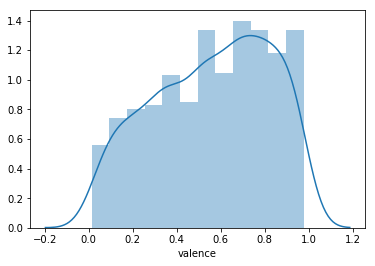

In [55]:
sb.distplot(df.valence)

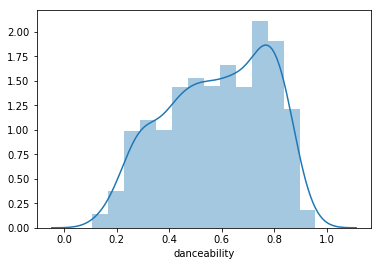

In [56]:
sb.distplot(df.danceability)

In [57]:
max_dance = df.danceability.max()
max_dance_track = df[df['danceability']==max_dance]

max_valence_track = sp.track(track_id=max_dance_track.id.iloc[0])
info = 'La más bailable: {} - {}'.format(max_valence_track['artists'][0]['name'], max_valence_track['name'])
print(info)


min_dance = df.danceability.min()
min_dance_track = df[df['danceability']==min_dance]

min_valence_track = sp.track(track_id=min_dance_track.id.iloc[0])
info = 'La menos bailable: {} - {}'.format(min_valence_track['artists'][0]['name'], min_valence_track['name'])
print(info)

La más bailable: Daft Punk - Around The World
La menos bailable: Deftones - Please Please Please Let Me Get What I Want
